# IMPORTANCE OF SCIKIT-LEARN IN MACHINE LEARNING USING PYTHON

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Dropping redundant columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Getting dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Stats of the dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Creating a column from the existing columns
df['engineered_column'] = df['TV'] + df['radio'] + df['newspaper']
df

,TV,radio,newspaper,sales,engineered_column
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='engineered_column', ylabel='sales'>

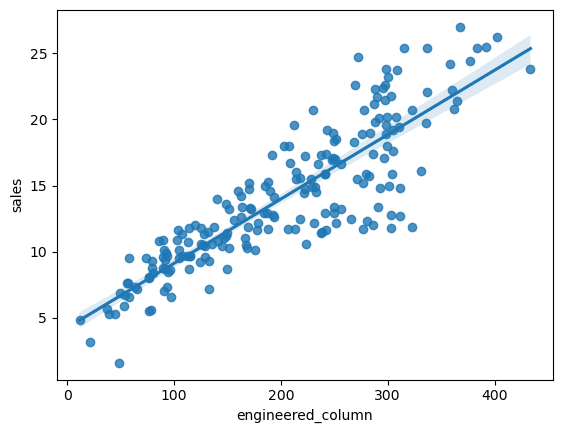

In [8]:
# Plotting a regression plot using seaborn
sns.regplot(data=df,x='engineered_column',y='sales')

In [9]:
# Dependent and independent variables
X = df['engineered_column']
y = df['sales']

In [10]:
# Linear equation coefficients by fitting a polynomial
coeffs = np.polyfit(X,y,deg=1) # Degree values greater than 1 are considered when you are solving non-linear problems
coeffs

array([0.04868788, 4.24302822])

In [11]:
#y = mx + b, where m is slope of regression line and b is the y-intercept of the regression line

# By observing the graph above we can notice that y-intercept is close to 5. Hence we can identify the coefficients
# we got as the result above

In [12]:
# Now to test the result we give some 'Engineered_col' values to predict the sales

In [13]:
# As per the linear regression equation 
def prediction(tv,radio,newspaper):
    engineered_value = tv + radio + newspaper
    y_pred = 0.04868788 * engineered_value + 4.24302822
    return y_pred

y_pred = prediction(50, 200, 100)
y_pred

21.28378622

```np.polyfit()``` method expects only 1-Dimensional array. This is not suitable for multi-variable problems. Also, for validating the predictions, we need to use an actual formula for it and it would be difficult while solving complex problems that require complex error metrics. Addition to this, there's a lot of manual process involved for solving a simple problem. Therefore we need a powerful Library that has all the predefined libraries, methods, and validation metrics for almost all kinds of machine learning problems. 

## SCIKIT-LEARN

Scikit-learn is an open-source Machine Learning library for python programming language.

In [14]:
# Install scikit-learn
!pip install scikit-learn

In [15]:
# Exploring scikit-learn library
help('sklearn')

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

# Linear Regression

### Hands-on: A simple Machine Learning Example

We will use the same dataset above (Advertising.csv) as a linear regression problem. This time we solve the problem using some powerful scikit-learn built-in libraries and methods.

In [16]:
df = pd.read_csv('Advertising.csv')

In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


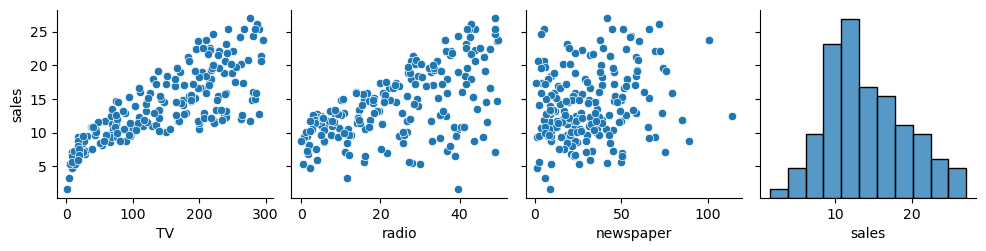

In [20]:
# Pairplot for visualizing sales wrto. TV, radio and newspaper
sns.pairplot(data=df,y_vars='sales')

We can identify a kind of linear pattern in (sales vs TV) and (sales vs radio) but for (sales vs newspaper) the
relation is kind of random. We may find similar observations with the ML model that we will be developing below.

In [21]:
X = df.drop('sales',axis=1)
y = df['sales']

In [22]:
from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
len(X_train), len(X_test), len(X)

(140, 60, 200)

In [24]:
60/200

0.3

In [25]:
# Preprocessing Step using StandardScaler (mean: 0, std: 1) & other method is MinMaxScaler (scales b/w 0 and 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [26]:
print('MEAN OF SCALED DATA: ', round(np.mean(scaled_X_train)))
print('STANDARD DEVIATION OF SCALED DATA: ',np.std(scaled_X_train))

MEAN OF SCALED DATA:  0
STANDARD DEVIATION OF SCALED DATA:  1.0


In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(scaled_X_train,y_train)

LinearRegression()

In [28]:
lr_model.coef_

array([3.68334078, 2.90625242, 0.14194772])

In [29]:
lr_model.intercept_

14.497142857142858

In [30]:
# Predictions 
y_predict = lr_model.predict(scaled_X_test)
y_predict

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [31]:
# Error Metrics MAE, MSE, RMSE

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test,y_predict)

1.5116692224549089

In [32]:
# Mean Squared Eror
mean_squared_error(y_test,y_predict)

3.796797236715223

In [33]:
# Root Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_predict))

1.9485372043446394

# Classification

## K Nearest Neighbors

K Nearest Neighbors is a classification algorithm for predicting categorical data. This Algorithm identifies the
nearest neighbors based on the distance between each datapoint and classifies them as a particular class.

In [34]:
iris = pd.read_csv('Iris.csv')

In [35]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='Species', ylabel='count'>

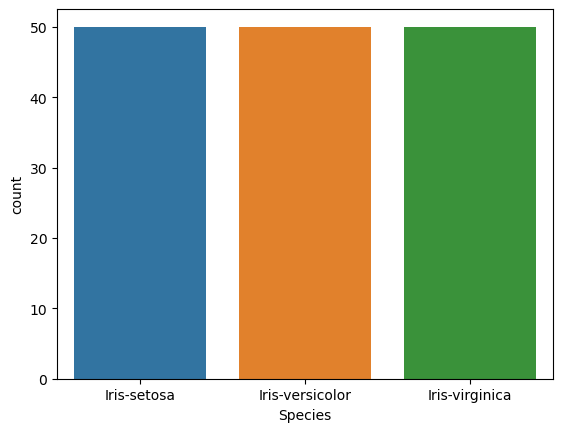

In [39]:
# Count plot for observing how balanced the data is
sns.countplot(data=iris,x='Species')

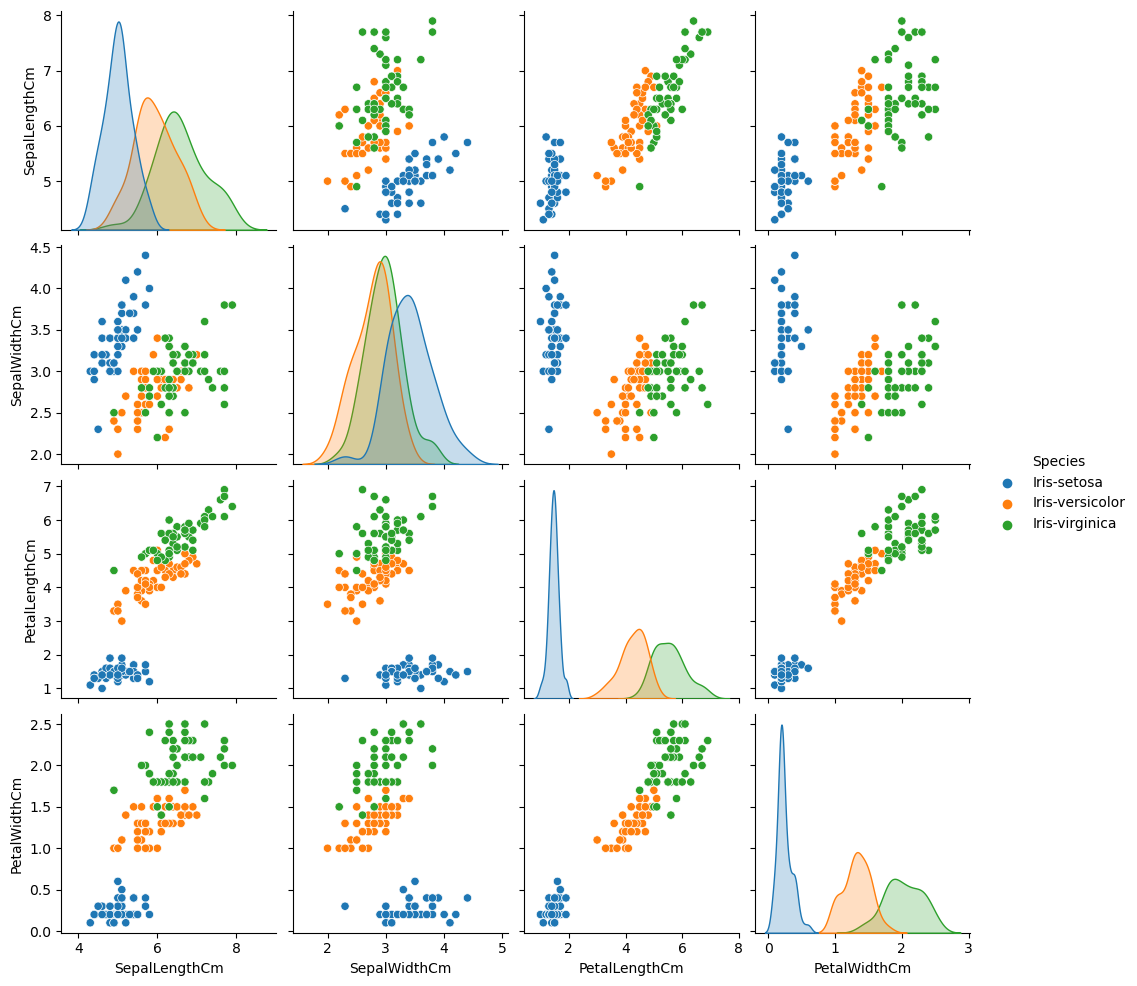

In [40]:
sns.pairplot(data=iris,hue='Species')

In [41]:
# Label Encoding using map()
iris['Species'] = iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# Preparing dataset for training and validation
X = iris.drop('Species',axis=1)
y = iris['Species']

In [44]:
# Train test split
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
len(X_train), len(X_test), len(X)

(105, 45, 150)

In [46]:
# Preprocessing step
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) 
# we are predicting test values based on train_data statistics, hence we do not transform test_data in preprocessing step
scaled_X_test = scaler.transform(X_test)

In [47]:
# Importing Knn package
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
# Predictions
y_predict = model.predict(scaled_X_test)
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [49]:
y_predict

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [50]:
np.array(y_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [51]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_predict)

0.9777777777777777

In [52]:
# Perfectly balanced dataset
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [53]:
# Test Dataset target variable count
y_test.value_counts()

0    19
1    13
2    13
Name: Species, dtype: int64

In [54]:
# Confusion matrix
confusion_matrix(y_test, y_predict).transpose()

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]])

In Above confusion Matrix VERSICOLOR is Predicted as VIRGINICA

These are target Labels {0: 'Setosa',1: 'Versicolor',2: 'Virginica'}

In [ ]:
'''Confusion Matrix - no more confusion'''


                     |  Actual Setosa   | Actual Versicolor | Actual Virginica
-------------------------------------------------------------------------------------    
Predicted Setosa     | True Setosa      | False Setosa      | False Setosa
Predicted Versicolor | False Versicolor | True Versicolor   | False Versicolor
Predicted Virginica  | False Virginica  | False Virginica   | True Virginica

In [56]:
# Classification report for precision and recall
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
''' PRECISION '''
For Setosa precision is  "(true setosa) / (total number of groups predicted as Setosa)"

0 | True Setosa / (True Setosa  + False Setosa + False Setosa)
1 | True Versicolor / (True Versicolor  + False Versicolor + False Versicolor) 
2 | True Virginica / (True Virginica  + False Virginica + False Virginica)

In [ ]:
'''RECALL'''
For Setosa recall is "(true setosa) / (total number of actual setosa)"


0 | True Setosa / (True Setosa  + False Versicolor + False Versicolor)
1 | True Versicolor / (True Versicolor  + False Setosa + False Virginica) 
2 | True Virginica / (True Virginica  + False Setosa + False Versicolor)

Text(0.5, 0, 'K Neighbors')

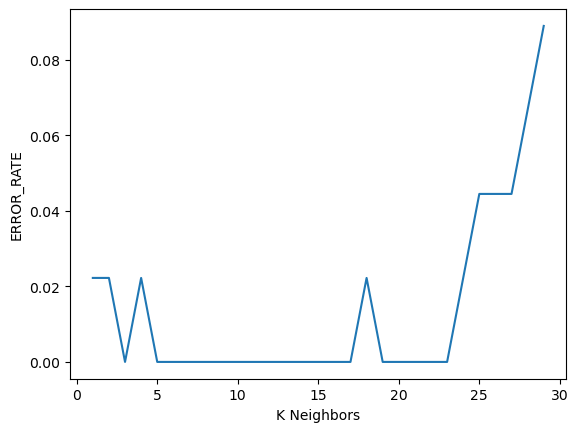

In [57]:
# Elbow Method - Finding the right value for K

# ERROR RATE => 1 - accuracy_score

test_error_list = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_predictions_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_predictions_test)
    test_error_list.append(test_error)
    
plt.plot(range(1,30),test_error_list)
plt.ylabel('ERROR_RATE')
plt.xlabel('K Neighbors')


# Thank you!